Problem Statment:
    
The trend of selling used car market in India is very dynamic, where prices fluctuate based on a variety of factors such as the type of car, its mileage, the engine, and many other factors.Therefore, accurate price prediction is very important to determine the correct price of cars.

This dataset contains the selling price of cars and various factors that influence car prices and the task is to make a selling price prediction model with the help of various factors present in the dataset.

## Import important libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("cardekho_imputated.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


## Data Description

In [3]:
## The transmission system in a vehicle is responsible for transmitting power from the engine to the wheels and allowing the driver to control the vehicle's speed and torque

## Exploratory Data Analysis

In [4]:
# Drop unnamed :0 column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

### a.) Data Understanding

In [5]:
df.shape

(15411, 13)

In [6]:
df.size

200343

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
## Missing values

df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [9]:
#df.describe()
summary=df.describe()
summary

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [10]:
##  Convert to decimal format by applying custom formatting

summary.applymap(lambda x: '{:.2f}'.format(x))

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [11]:
## check for duplicates

df.duplicated().sum()

167

In [12]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

### b.) Univariate Analysis

In [13]:
## Numerical Variables

num_feature=[x for x in df.columns if df[x].dtype in ["int64","float64"]]
print(num_feature)

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [14]:
#[df[x].min() for x in num_feature]

for x in num_feature:
    print("minimum of", x ,":" ,'{:.2f}'.format(df[x].min()))

    print("maximum of", x ,":" ,'{:.2f}'.format(df[x].max()) )
    print("std deviation of", x ,":" ,'{:.2f}'.format(df[x].std()))
    print("average of",x ,":" ,'{:.2f}'.format(df[x].mean()))
    print("--------------------------------------------------------")

minimum of vehicle_age : 0.00
maximum of vehicle_age : 29.00
std deviation of vehicle_age : 3.01
average of vehicle_age : 6.04
--------------------------------------------------------
minimum of km_driven : 100.00
maximum of km_driven : 3800000.00
std deviation of km_driven : 51618.55
average of km_driven : 55616.48
--------------------------------------------------------
minimum of mileage : 4.00
maximum of mileage : 33.54
std deviation of mileage : 4.17
average of mileage : 19.70
--------------------------------------------------------
minimum of engine : 793.00
maximum of engine : 6592.00
std deviation of engine : 521.11
average of engine : 1486.06
--------------------------------------------------------
minimum of max_power : 38.40
maximum of max_power : 626.00
std deviation of max_power : 42.97
average of max_power : 100.59
--------------------------------------------------------
minimum of seats : 0.00
maximum of seats : 9.00
std deviation of seats : 0.81
average of seats : 5.33


In [15]:
# Distribution of numerical features

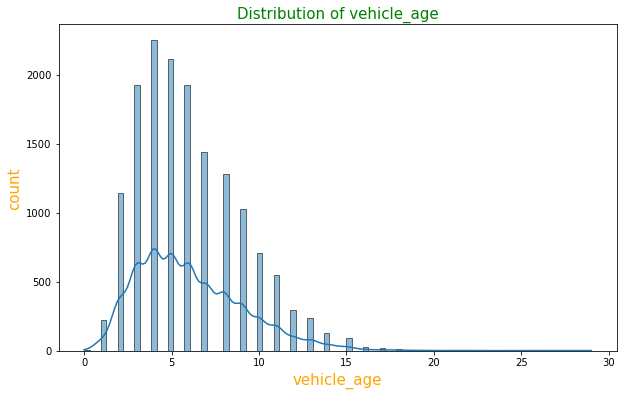

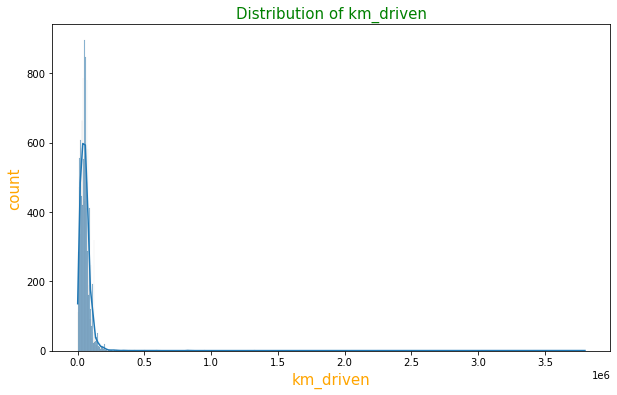

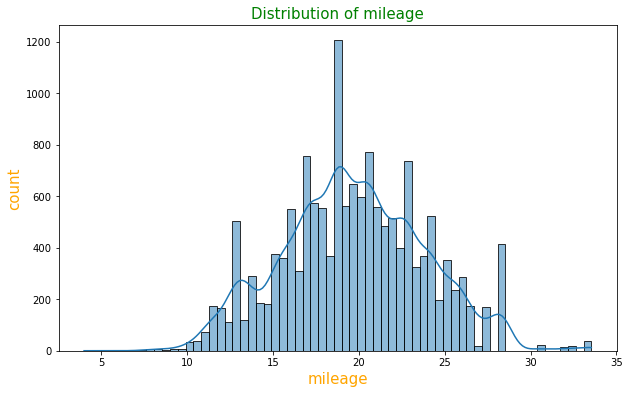

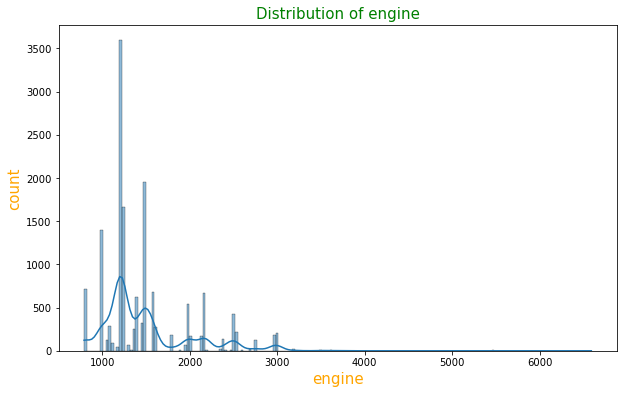

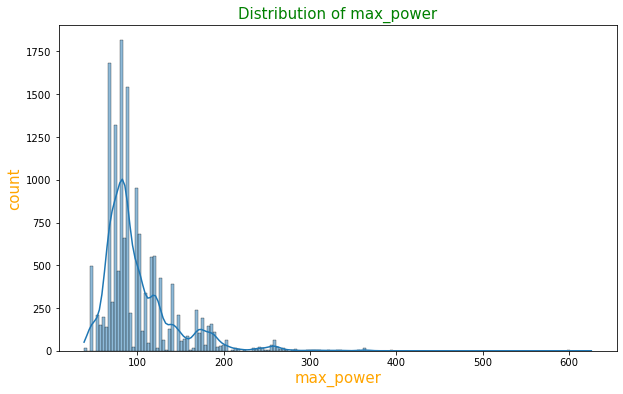

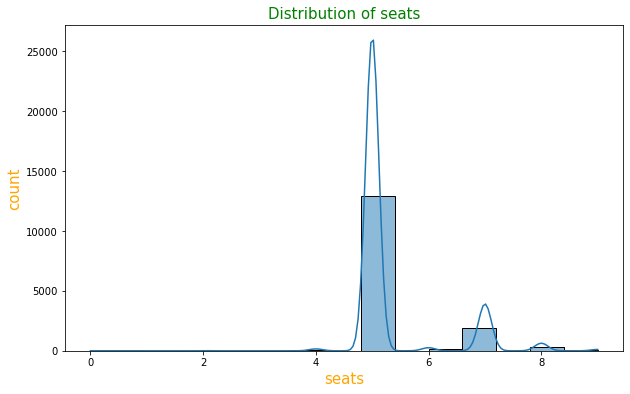

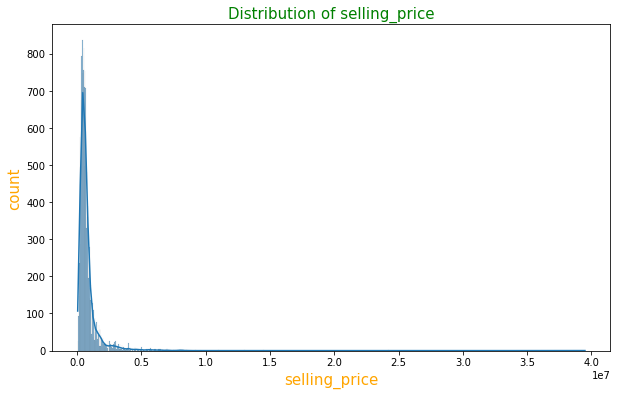

In [16]:
for feature in num_feature:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature],kde=True)
    plt.xlabel(feature,color='orange',fontsize=15)
    plt.ylabel('count',color='orange',fontsize=15)
    plt.title(f"Distribution of {feature}" ,color='green',fontsize=15)
    plt.show()

In [17]:
# See, how rest of the features affect the selling price of car?

cat_feature=[x for x in df.columns if df[x].dtype=='O']
print(cat_feature)

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [18]:
df["car_name"].mode()[0]

'Hyundai i20'

In [19]:
for x in cat_feature:
    print("mode of", x ,":" ,df[x].mode()[0])

mode of car_name : Hyundai i20
mode of brand : Maruti
mode of model : i20
mode of seller_type : Dealer
mode of fuel_type : Petrol
mode of transmission_type : Manual


INSIGHTS:
    
The highest selling car model is the HYUNDAI i20.
The most popular car brand is MARUTI.
Most of the cars are purchased by dealers.
Petrol is the most commonly used fuel type.
The majority of cars have a manual transmission.

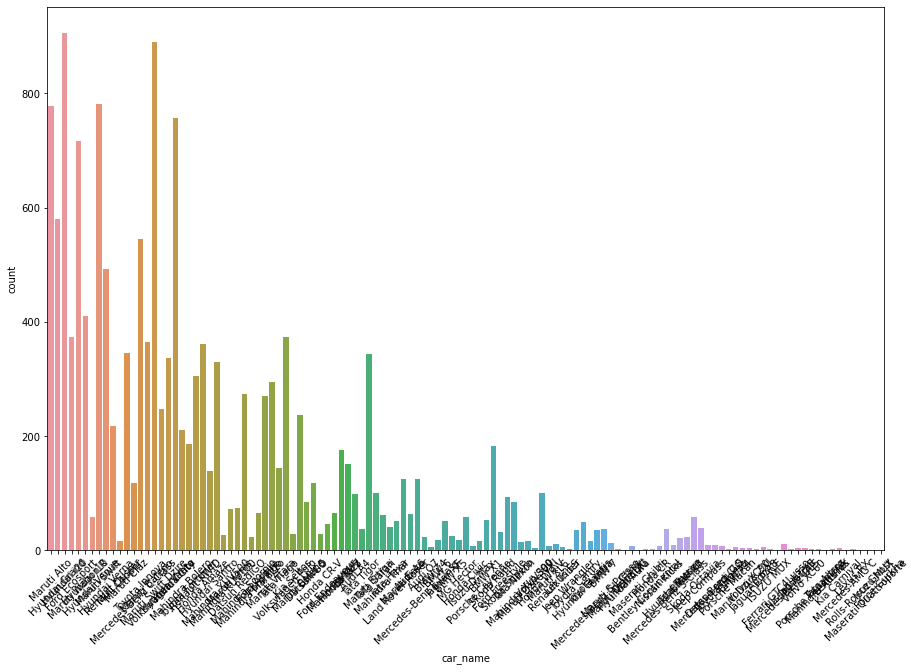

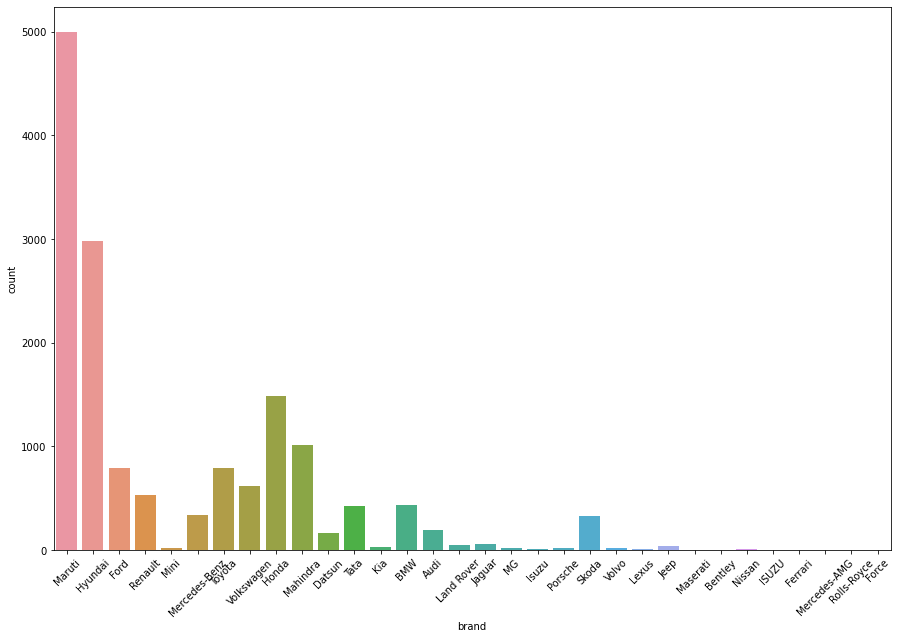

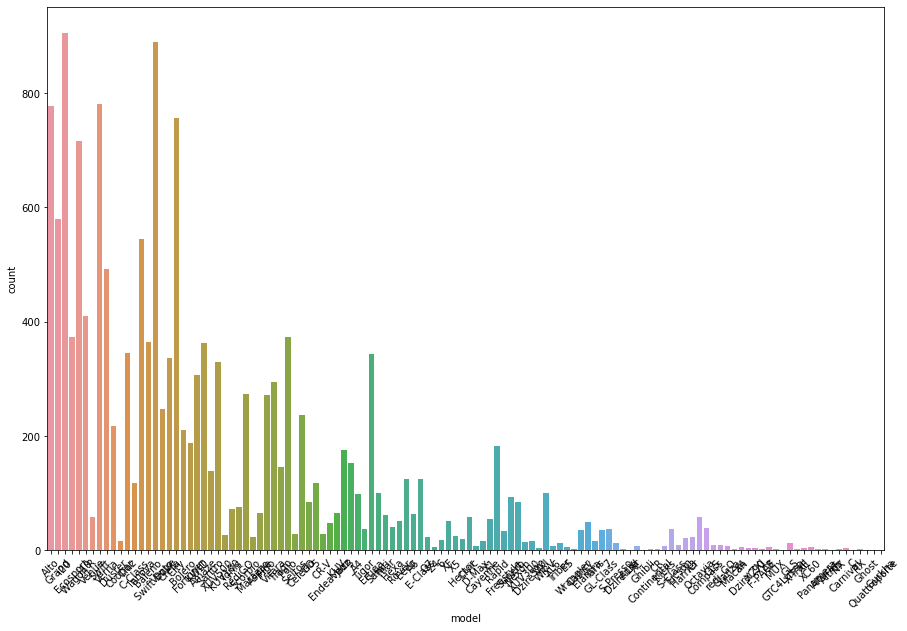

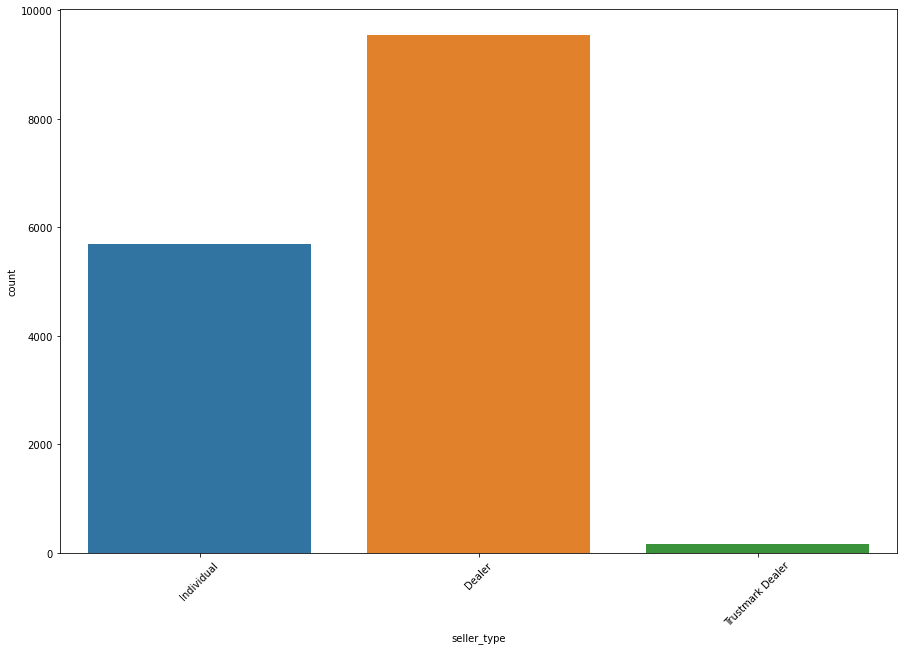

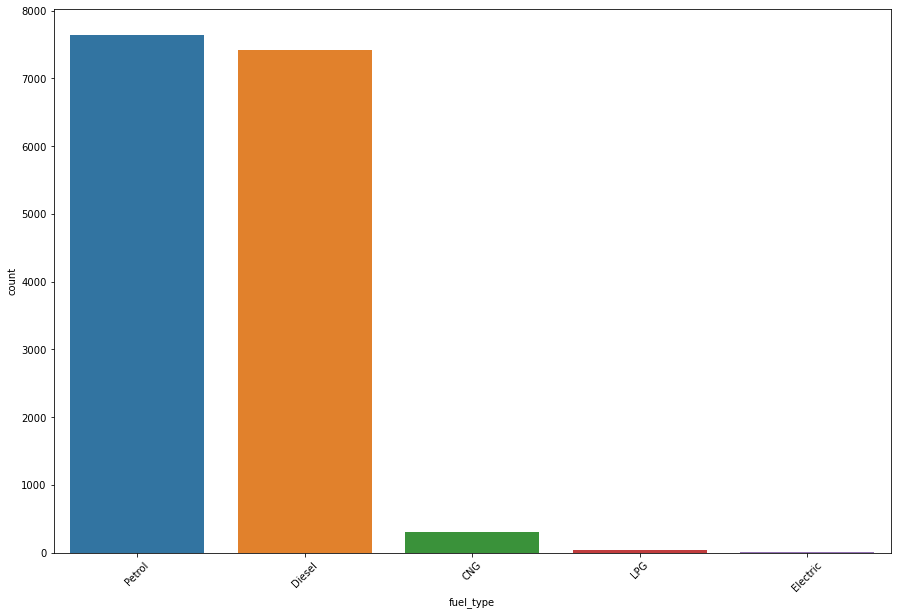

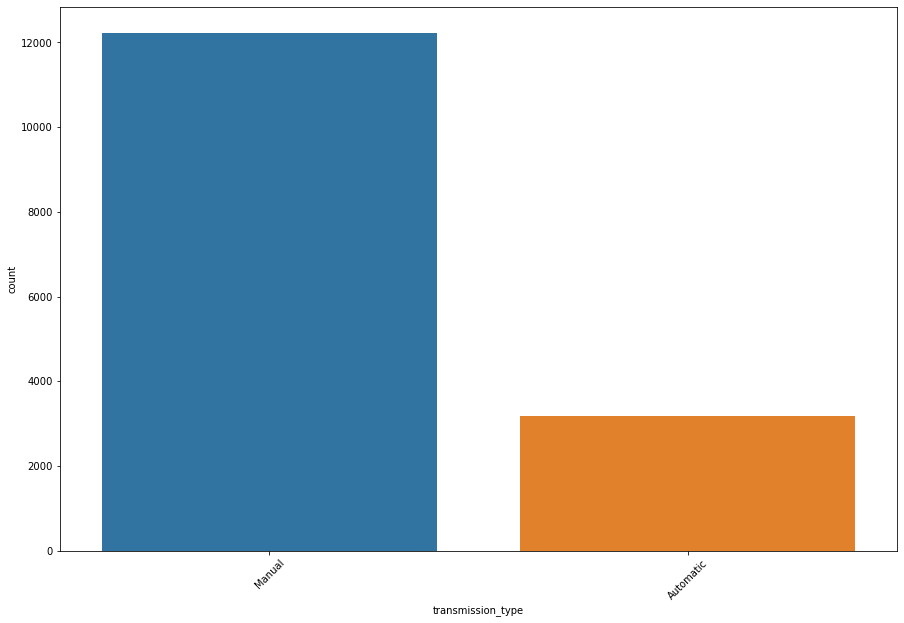

In [20]:

for x in cat_feature:
    plt.figure(figsize=(15,10))
    sns.countplot(df[x])
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.ylabel("count")
    plt.show()
    
    

In [21]:
df["car_name"].nunique()

121

In [22]:
df['model'].nunique()

120

In [23]:
df['brand'].nunique()

32

In [24]:
df['seller_type'].nunique()

3

In [25]:
df['fuel_type'].nunique()

5

In [26]:
df['transmission_type'].nunique()

2

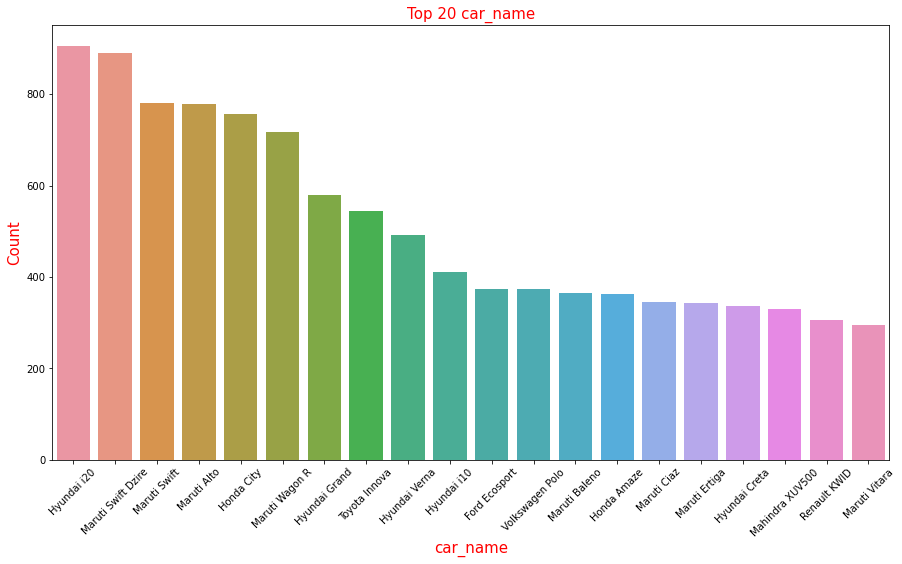

<Figure size 1080x576 with 0 Axes>

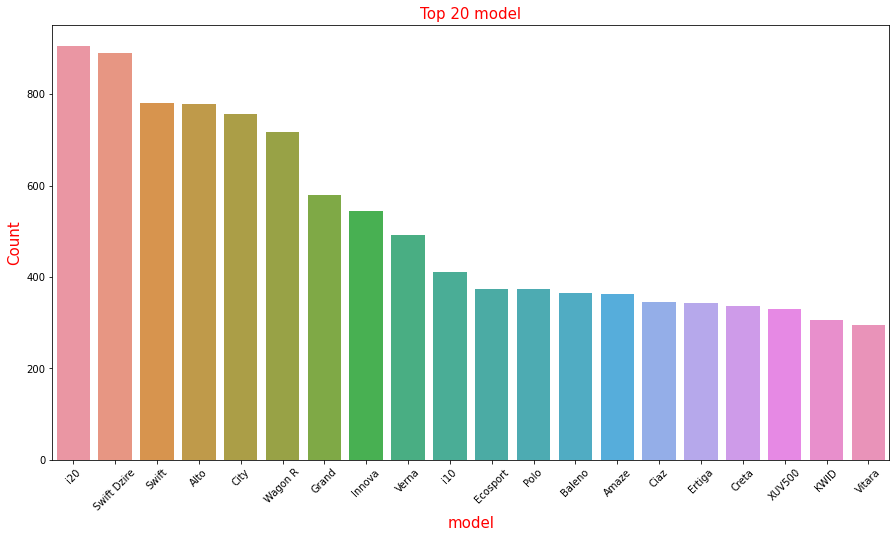

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [27]:
for feature in cat_feature:
    plt.figure(figsize=(15,8))
    
    if feature in ['car_name', 'model']:
        # Get the top 20 categories
        top_20_categories = df[feature].value_counts().nlargest(20)
        
        # Convert to DataFrame for plotting
        plot_data = pd.DataFrame({feature: top_20_categories.index, 'count': top_20_categories.values})
        
        sns.barplot(x=feature,y='count', data=plot_data)
        plt.xlabel(feature,color='red',fontsize=15)
        plt.ylabel('Count',color='red',fontsize=15)
        plt.title(f'Top 20 {feature}',color='red',fontsize=15)
        plt.xticks(rotation=45)
        plt.show()

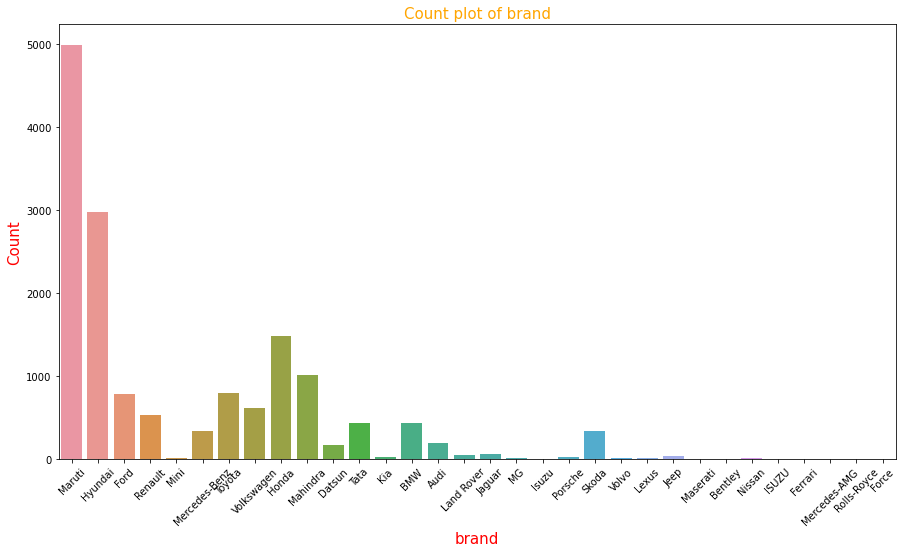

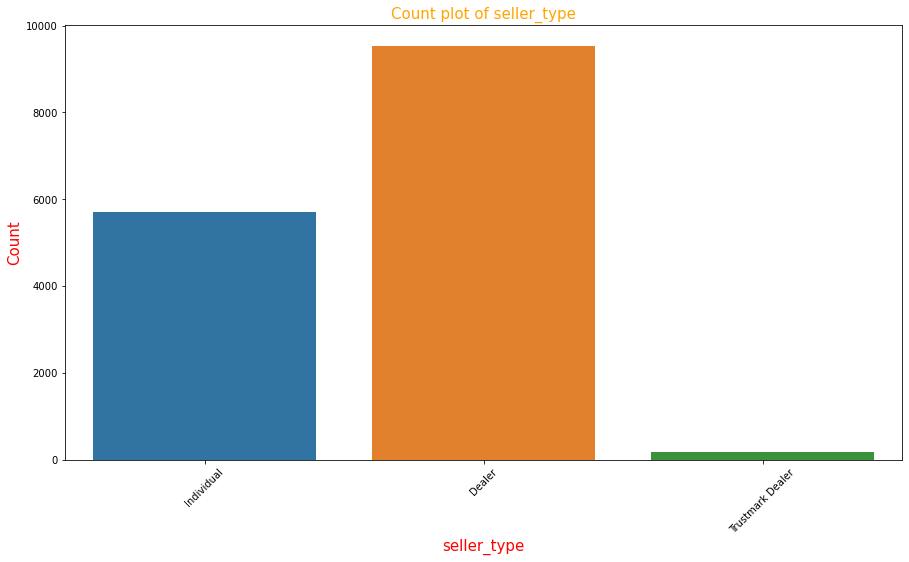

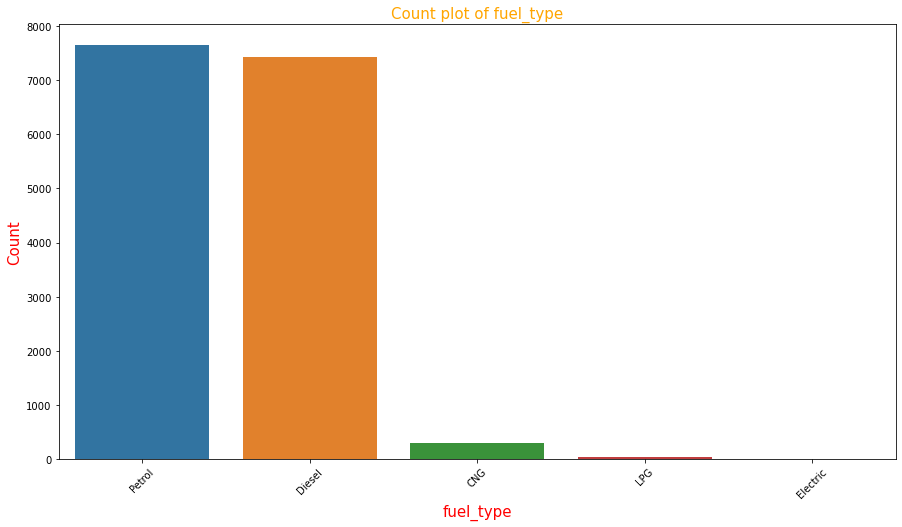

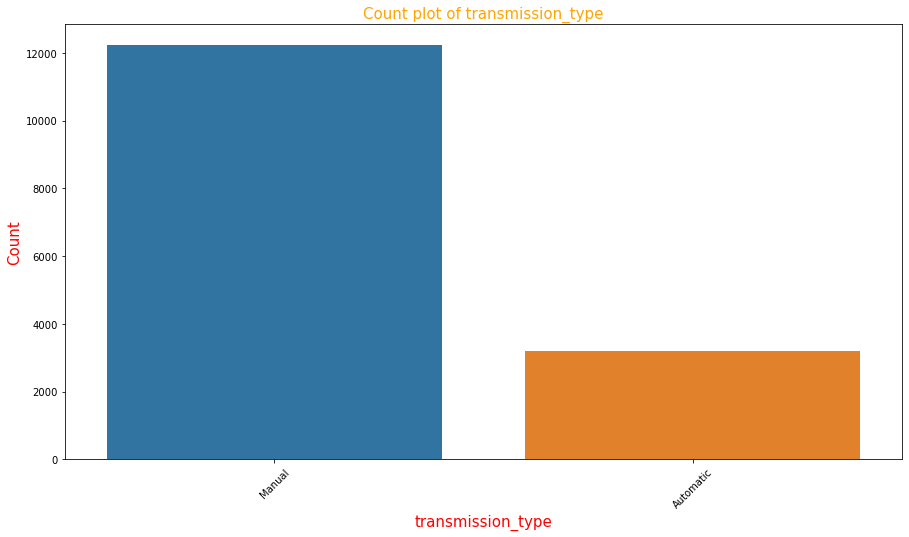

In [28]:
for feature in ['brand', 'seller_type', 'fuel_type', 'transmission_type']:
    plt.figure(figsize=(15,8))

    sns.countplot(x=feature, data=df)
    plt.xlabel(feature,color='red',fontsize=15)
    plt.ylabel('Count',color='red',fontsize=15)
    plt.title(f'Count plot of {feature}',color='orange',fontsize=15)
    plt.xticks(rotation=45)
    plt.show()
    


## c.) Bivariate Analysis

Bivariate analysis helps uncover correlations and associations between different factors. i,e How much information every  independent variable carry about dependent/target variable.

In [29]:
## Here, I am using Scatter plot to see the relationship between two numerical variables &
## Bar Plot to see the relationship between two categorical varibale & one categorical and one numerical variable.

In [30]:
num_feature

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

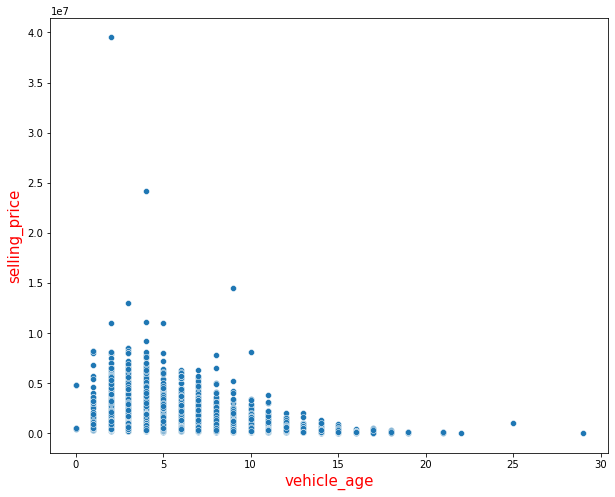

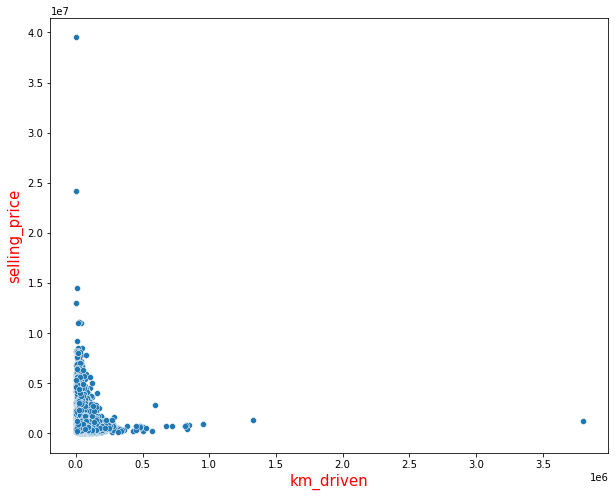

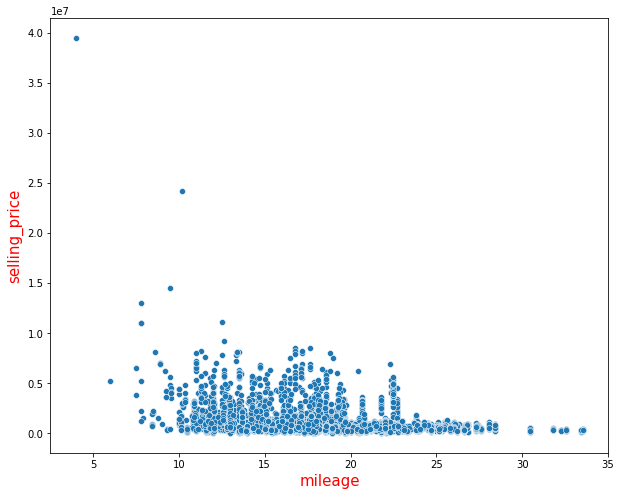

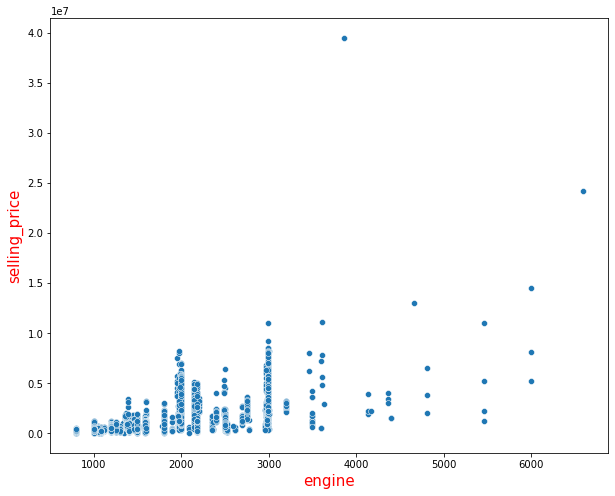

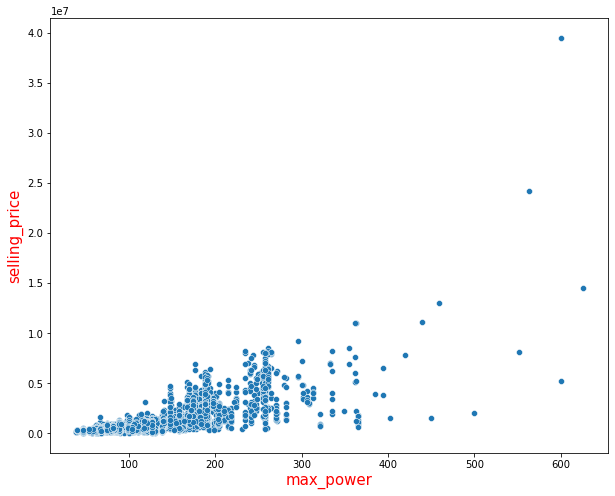

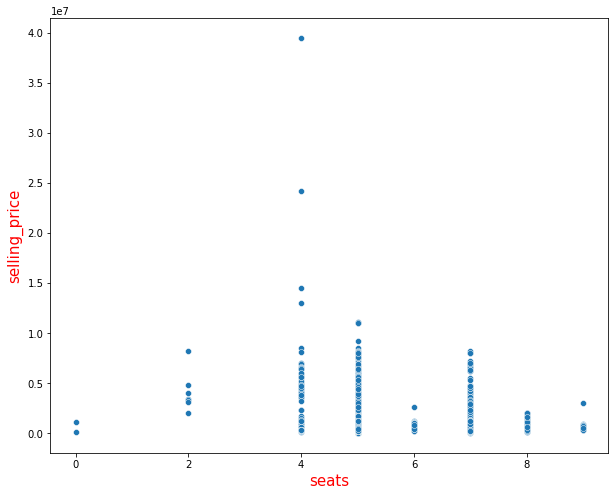

<Figure size 720x576 with 0 Axes>

In [31]:
#Scatter plot

for feature in num_feature:
    plt.figure(figsize=(10,8))
    if feature!='selling_price':
        sns.scatterplot(feature,y="selling_price",data=df)
        plt.xlabel(feature,color='red',fontsize=15)
        plt.ylabel("selling_price",color='red',fontsize=15)
        plt.show()

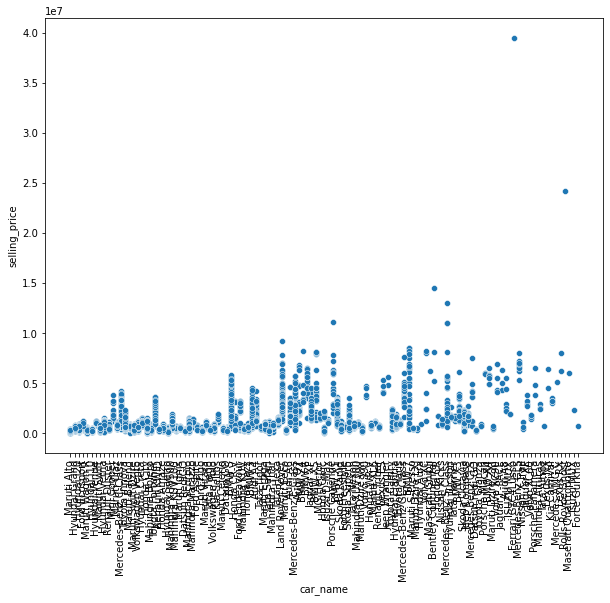

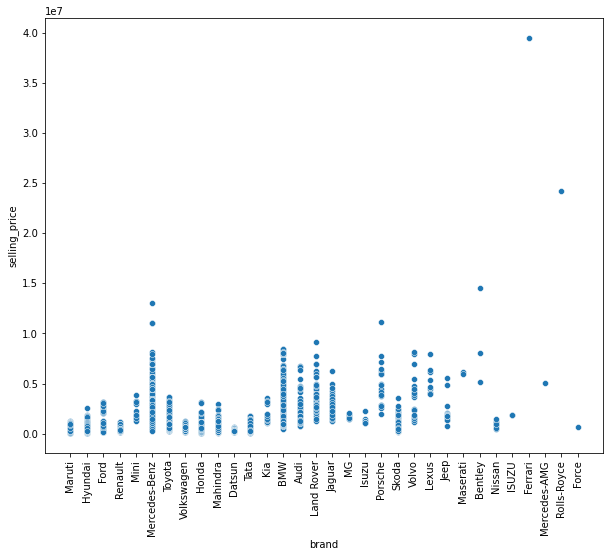

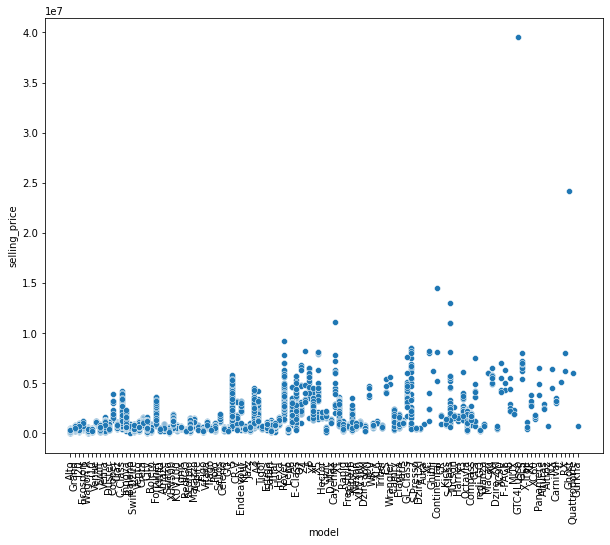

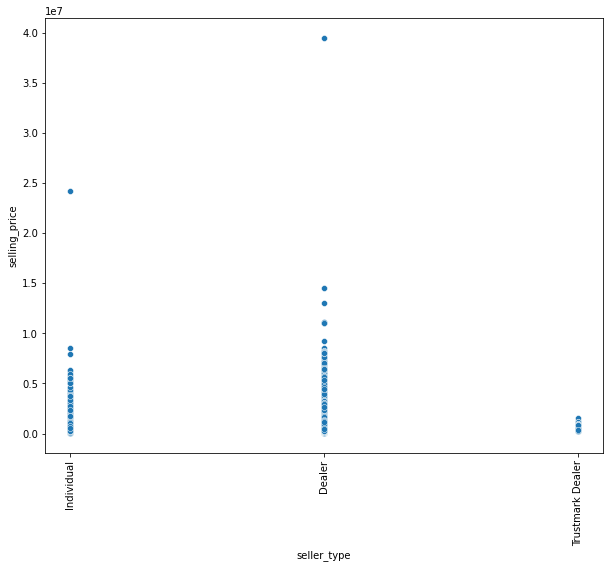

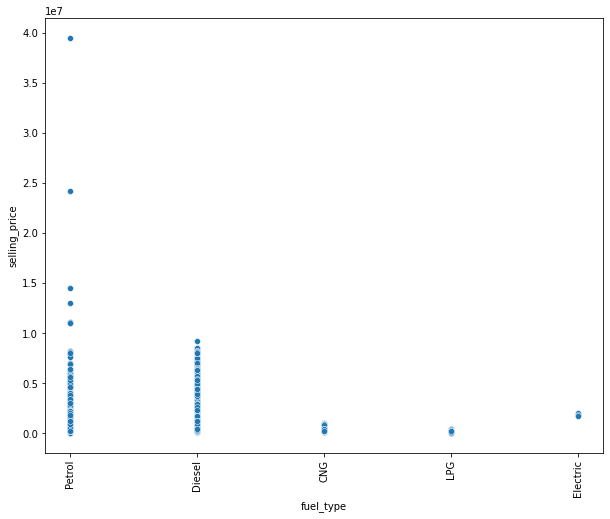

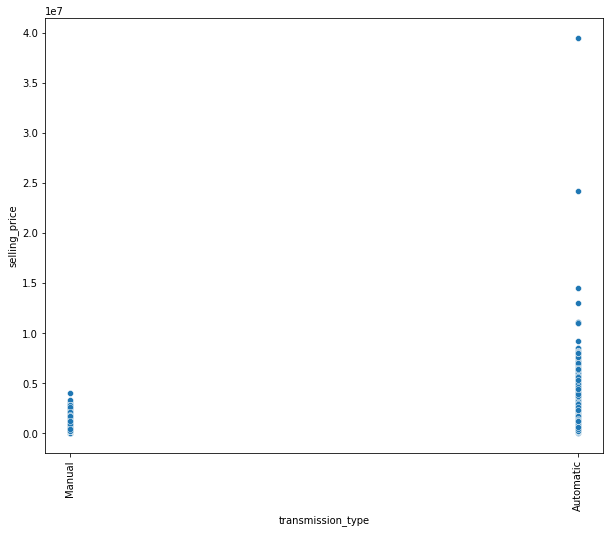

In [32]:
for feature in cat_feature:
    plt.figure(figsize=(10,8))
    sns.scatterplot(feature,y=df["selling_price"],data=df)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel("selling_price")
    plt.show()

## D.) Multivariate Analysis

In multivariate analysis, we'll be dealing with more than two variables to understand their relationships, dependencies, and patterns.
We have to see how each and every features are correlated with each other and with the Target variable i,e selling_price.
It also gives the idea of multicolinearity among features.

Since i also have categorical columns in my datset. So, to see the correlation of all the features, i need to encode the cat columns and then apply corr()

In [33]:
df1=df.copy()

In [34]:
df1_encoded=pd.get_dummies(df1,columns=cat_feature)
df1_encoded.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,car_name_Audi A4,car_name_Audi A6,car_name_Audi A8,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [35]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()  
lb


LabelEncoder()

In [36]:
for feature in cat_feature:
    df1[feature] = lb.fit_transform(df1[feature])

In [37]:
df1.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,65,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,34,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,40,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,65,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,20,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


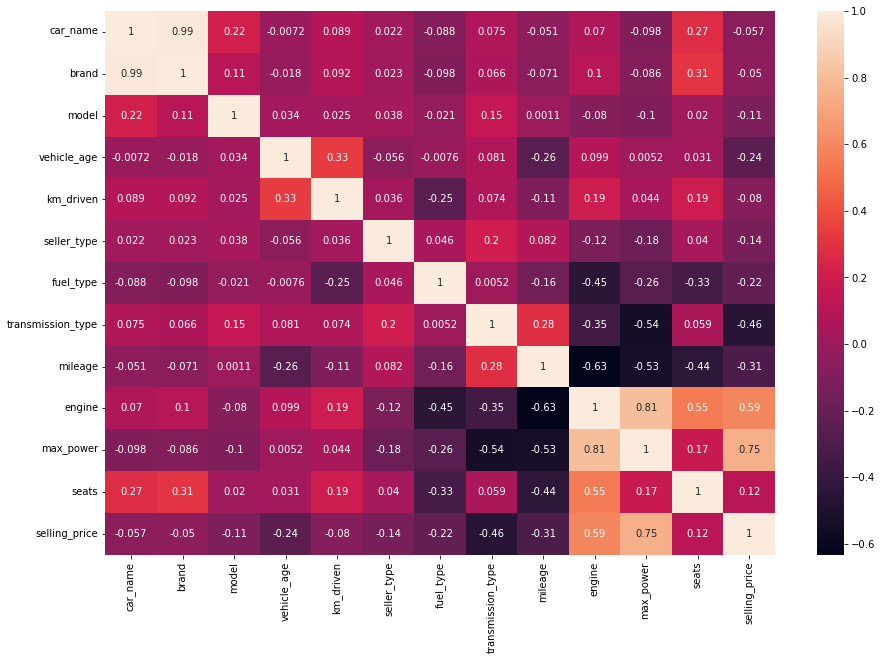

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

## E.) Outliers

In [ ]:
# detecting outliers..

In [40]:
print(num_feature)

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


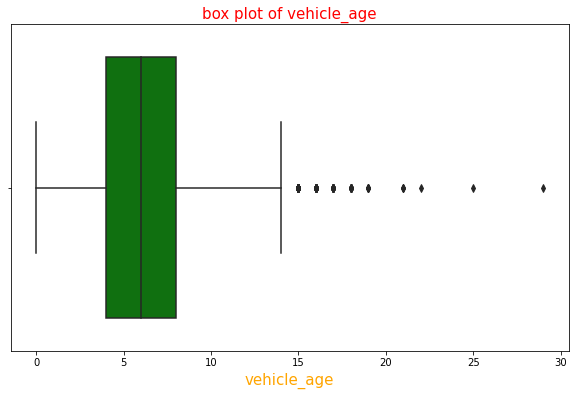

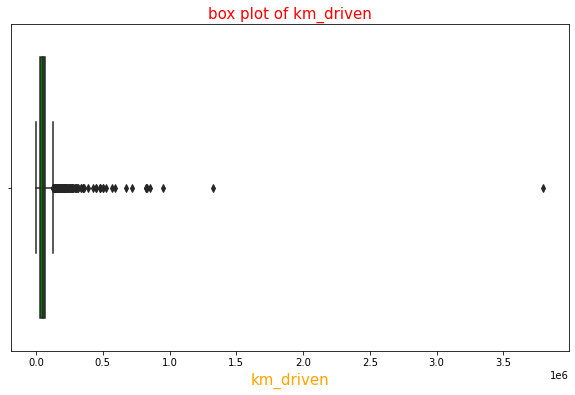

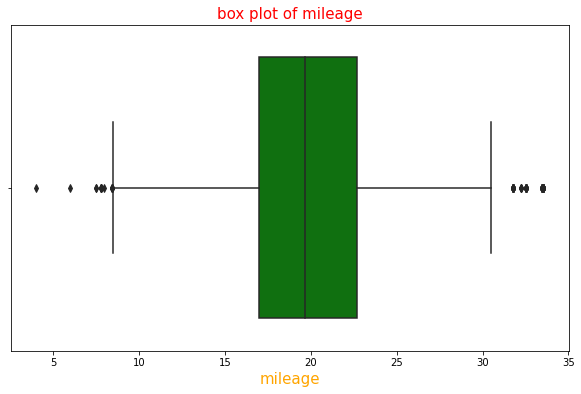

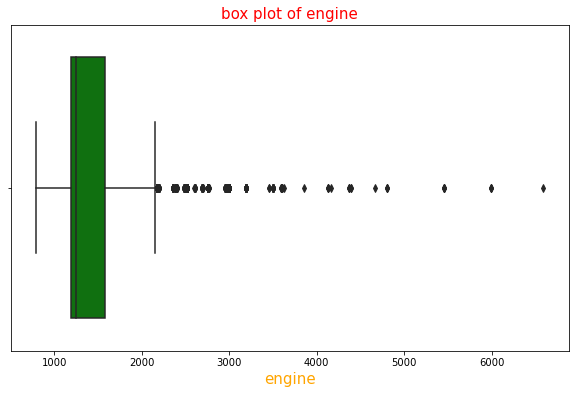

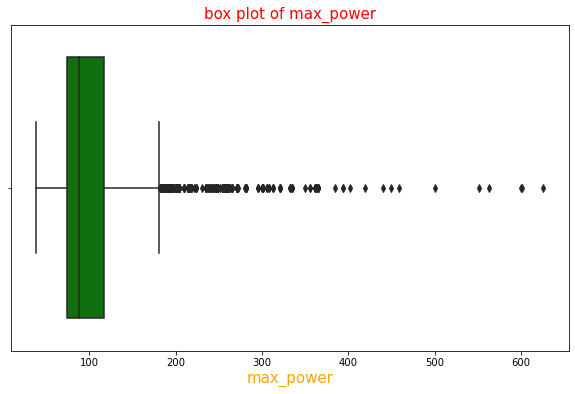

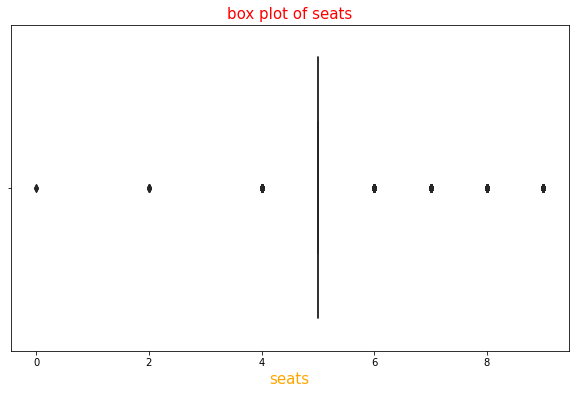

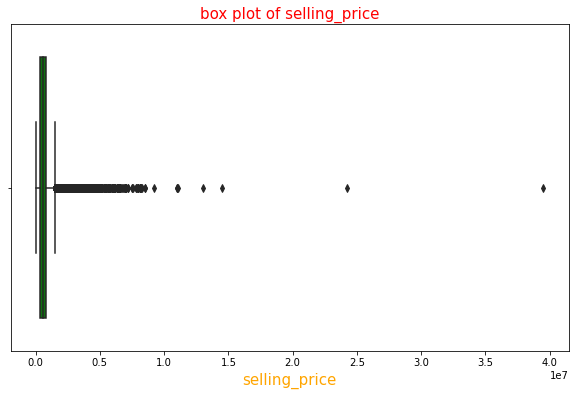

In [47]:
for x in num_feature:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[x],color='green')
    plt.xlabel(x,color='orange',fontsize=15)
    plt.title(f'box plot of {x}',color='red',fontsize=15)
               
    plt.show()